# Pandas Intro Exercise

Complete this notebook, or get as far as you can.

Most of the questions here entail adapting examples from today's intro, for some you may need to google/chatbot a bit.

In [ ]:
import pandas as pd


## Book Publishing Data

This is a not great data set (you'll see) that I download from github:

https://gist.github.com/apietrick24/bfffc6c0d47abf00029790381e89626d

Sometimes pandas can be very useful for just evaluating how useful a data set is. As you will see, this is not a trustworthy or useful data set. But there's enough in here to play around with.

And it should load in nicely without any encoding necessary.

In [ ]:

df = pd.read_csv("bookPublishingData.csv")

#### Take a Look at the Data

In [ ]:
# You can set how many cols and rows it displays
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df

In [ ]:
#top rows...
df.head()

In [ ]:
# top 10
df.head(10)

In [ ]:
# rows at the end...
df.tail(8)

#### Explore and Clean


Those years in the first column are very odd. Let's check their data type.

In [ ]:
df.columns.values
slected_columns = ['Publishing_Year']
df[slected_columns].dtypes

Look for missing values in that column

In [ ]:
df[df['Publishing_Year'].isnull()]

Remove the row with a missing value!

In [ ]:
i = df[df['Author'] == 'Robert Kapilow, Dr. Seuss'].index
i

In [ ]:
df = df.drop(i)

And now change the data type to an integer!

In [ ]:
df['Publishing_Year'] = df['Publishing_Year'].astype(int)

Look at the dataframe to make sure the change worked.

In [ ]:
df.head(5)
df['Publishing_Year'].dtypes

Let's look at the language code. How many different language codes are there and how many instances of each of them?

In [ ]:
df['Language_Code'].value_counts()

Ummm I don't think the en-US, -GB, -CA seems particularly consistent or useful. 

Let's change all of those just to `eng`

In [ ]:
import re
df['Language_Code'] = df['Language_Code'].str.replace('en-US','eng')
df['Language_Code'] = df['Language_Code'].str.replace('en-GB','eng')
df['Language_Code'] = df['Language_Code'].str.replace('en-CA','eng')


Now check that column again for unique values and their counts, to make sure your change worked!

In [ ]:
df['Language_Code'].value_counts()

A cursory look through this dataset reveals that there are a handful of missing titles, which seems pointless.

Please show all of the rows that are missing a title.

In [ ]:
df.head()
df[df['Book_Name'].isnull()]

Now, just remove all of those rows.

If you search online, you should be able to find a way to remove all of the rows that have missing value for that column.

In [ ]:
df = df.dropna(subset=['Book_Name'])
df[df['Book_Name'].isnull()]

Show all the entries for Books that have "World" in the title.

In [ ]:
regex = r'\bWorld\b'
df[df['Book_Name'].str.contains(regex)]

Show all the entries for Books that have the word "Fire" in the title.

In [ ]:
fire = r'\bFire\b'
df[df['Book_Name'].str.contains(fire)]

What are these "Author_Rating"s?

What are they, and how many of each.

In [ ]:
df['Author_Rating'].value_counts()

Show all the entries for Novice authors (so we can see how useless this category is...)

In [ ]:
df[df['Author_Rating'] == 'Novice']

Find the 10 books with the highest average rating that were published before the year 2000

In [ ]:
highest_avg = df.sort_values(by='Book_Average_Rating',ascending=False).head(10)
before_year = df['Publishing_Year'] < 2000
df[before_year].sort_values(by='Book_Average_Rating',ascending=False).head(10)

Find the 10 non-fiction books with the highest average rating. 

(and note how useless the genre category is too...)

In [ ]:
#non_fiction
non_fiction = df['Genre'] == 'nonfiction'
df[non_fiction].sort_values(by='Book_Average_Rating',ascending=False).head(10)

Show the 10 fiction books with the highest gross sales.

In [ ]:
#genre fiction	
non_fiction = df['Genre'] == 'fiction'
df[non_fiction].sort_values(by='Gross_Sales',ascending=False).head(10)

If you looked at the results, you would've noticed that the title BLEACH has a bunch of useless characters after it, likely the Japanese characters for that title. Remove the characters and replace it either with BLEACH.

In [ ]:
regex_bleach = r'[¼ãƒâ€•ã€€1]'
df[df['Book_Name'].str.contains(regex_bleach)]
df['Book_Name'] = df['Book_Name'].str.replace('BLEACHâ€•ãƒ–ãƒªãƒ¼ãƒâ€•ã€€1','BLEACH')


Re-run the the previous quarry to make sure that bleach is fixed.

In [ ]:
non_fiction = df['Genre'] == 'fiction'
df[non_fiction].sort_values(by='Gross_Sales',ascending=False).head(10)

What 10 authors have the most books in this dataset?

In [ ]:
top_authors = df['Author'].value_counts().head(10)
top_authors

What are the max, min, and mean of Units Sold

In [ ]:
units_stats = df['Units_Sold'].describe()
units_stats
##Searched for how to show only min, max and mean and found the agg() function 
units_stats_specific = df['Units_Sold'].agg(['min', 'max', 'mean'])
print(units_stats,'\n',units_stats_specific)

Show the titles with the 10 most units sold, but only show the columns that have:

Author name, book title, genre, units sold.

In [ ]:
colms = df[['Author','Book_Name','Units_Sold','Genre']]
most_units_titles = colms.sort_values(by='Units_Sold', ascending=False).head(10)
most_units_titles

What are the total units sold for each genre?

In [ ]:
colms_g_u = df[['Genre','Units_Sold']]
total_units_g = colms_g_u.groupby('Genre').sum()
total_units_g

Which 15 authors have sold the most units?

In [ ]:
colms_a_u = df[['Author','Units_Sold']]
total_units_a = colms_a_u.groupby('Author').sum().sort_values(by='Units_Sold', ascending=False).head(15)
total_units_a

Finally, show which authors have sold the most units along with the number of books.

I didn't demo how to do this (hint grouping with two aggregates...)

See if you can look it up and figure it out...

In [ ]:
colms_a_u = df[['Author','Units_Sold', 'Book_Name']]
total_units_a = colms_a_u.groupby('Author').agg(Books_count=('Book_Name', 'count'),Units_sold_sum=('Units_Sold', 'sum')).sort_values(by='Units_sold_sum', ascending=False).head(15)
print(total_units_a)

In [ ]:
colms_a_u = df[['Author','Units_Sold', 'Book_Name']]
df_group = colms_a_u.groupby('Author').agg(Books_count=('Book_Name', 'count'),Units_sold_sum=('Units_Sold', 'sum')).sort_values(by='Units_sold_sum', ascending=False).head(15).reset_index()
df_group


<Axes: ylabel='Author'>

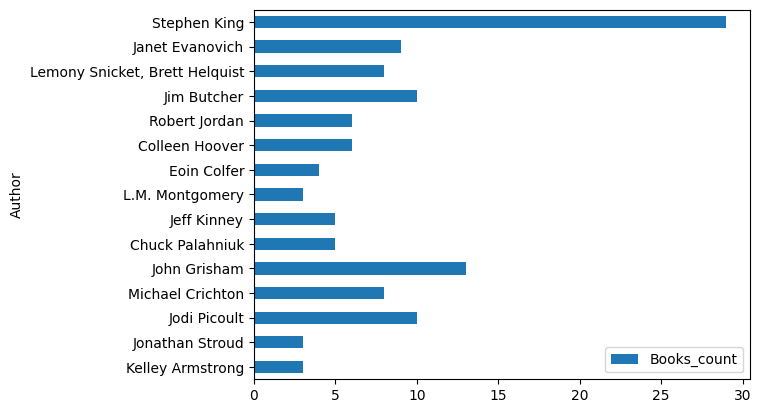

In [21]:
forplot = df_group.sort_values(by='Units_sold_sum',ascending=False).head(20)
df_group.sort_values(by='Units_sold_sum').plot(
        x='Author',
        y='Books_count',
        #y = 'Units_sold_sum',
        kind='barh'
    ) 